In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from geometry import PupilGeometry

In [2]:
pupil = PupilGeometry()

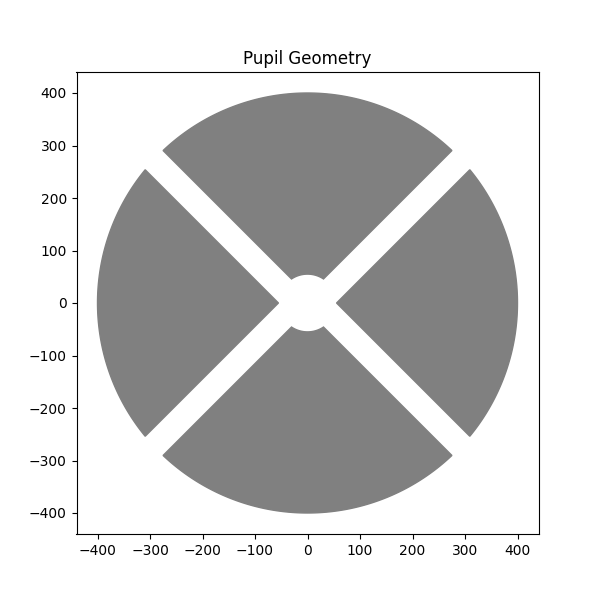

In [3]:
pupil.plot_pupil()


In [4]:
x, y, weights = pupil.create_pixel_weights(num_pixels=400)

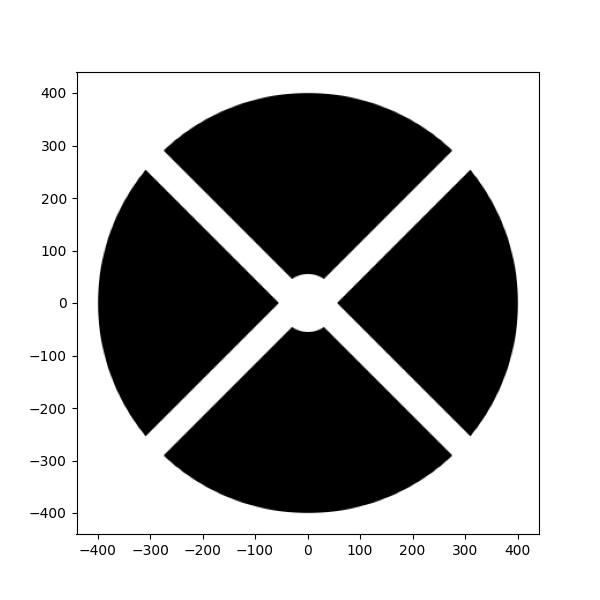

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(weights.T, cmap='gray_r', extent=(x.min(), x.max(), y.min(), y.max()))
#plt.colorbar()

In [8]:
from astropy.io import fits
hdu = fits.PrimaryHDU(weights)
hdu.header['XMIN'] = x.min()
hdu.header['XMAX'] = x.max()
hdu.header['YMIN'] = y.min()
hdu.header['YMAX'] = y.max()
hdul = fits.HDUList([hdu])
hdul.writeto('gray_pupil.fits')


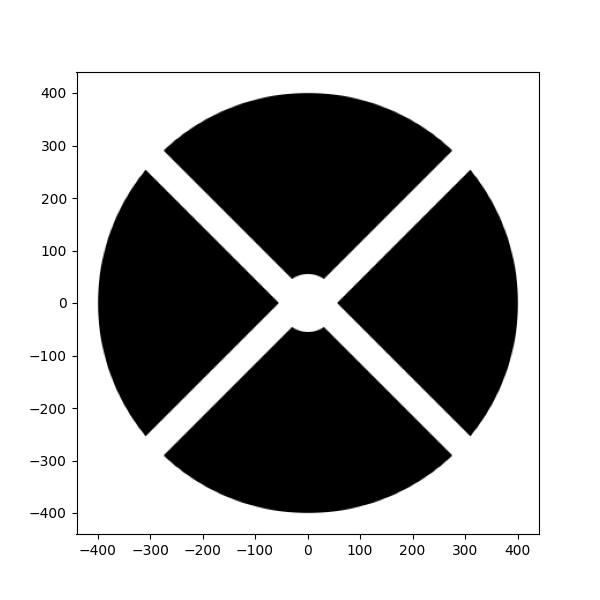

In [11]:
data,hdr = fits.getdata('gray_pupil.fits',header=True)
xmin = hdr['XMIN']
xmax = hdr['XMAX']
ymin = hdr['YMIN']
ymax = hdr['YMAX']
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(data.T, cmap='gray_r', extent=(xmin, xmax, ymin, ymax))